<a href="https://colab.research.google.com/github/shivendra1-cyber/Business-Case-Aerofit---Descriptive-Statistics-Probability/blob/main/Business_Case_Aerofit_Descriptive_Statistics_%26_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files


uploaded = files.upload()


Saving aerofit_treadmill.csv to aerofit_treadmill.csv


In [8]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['aerofit_treadmill.csv']))
print(df)


    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     KP281   18    Male         14        Single      3        4   29562   
1     KP281   19    Male         15        Single      2        3   31836   
2     KP281   19  Female         14     Partnered      4        3   30699   
3     KP281   19    Male         12        Single      3        3   32973   
4     KP281   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   KP781   40    Male         21        Single      6        5   83416   
176   KP781   42    Male         18        Single      5        4   89641   
177   KP781   45    Male         16        Single      5        5   90886   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
0      112  
1       75  
2       66  
3       85  
4       47

In [9]:
df.shape

(180, 9)

In [10]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<Axes: xlabel='Education', ylabel='Miles'>

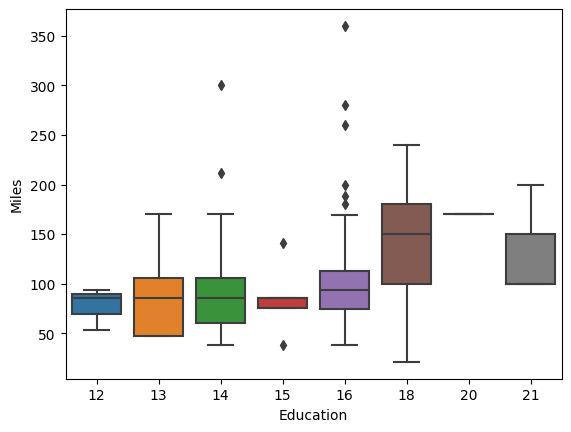

In [11]:
import seaborn as sbn
sbn.boxplot(x='Education', y='Miles', data=df)

<Axes: xlabel='Gender', ylabel='Income'>

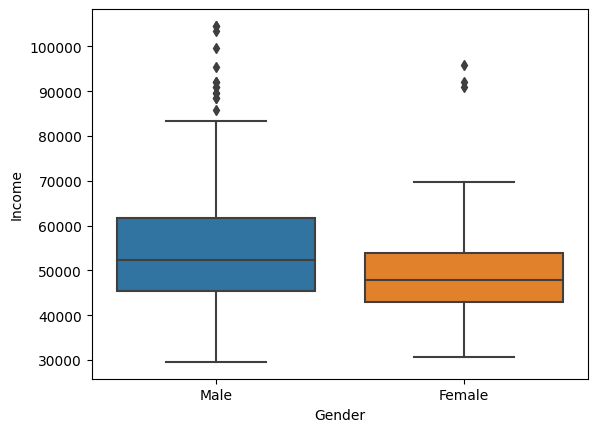

In [12]:
sbn.boxplot(x='Gender', y='Income', data=df)

<Axes: xlabel='Gender', ylabel='Income'>

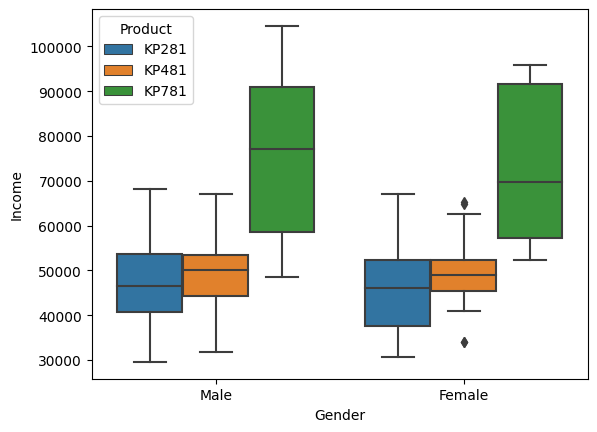

In [13]:
sbn.boxplot(x='Gender', y='Income',hue='Product' ,data=df)

<ipython-input-14-7122ea2d14ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(df.corr(), annot=True


<Axes: >

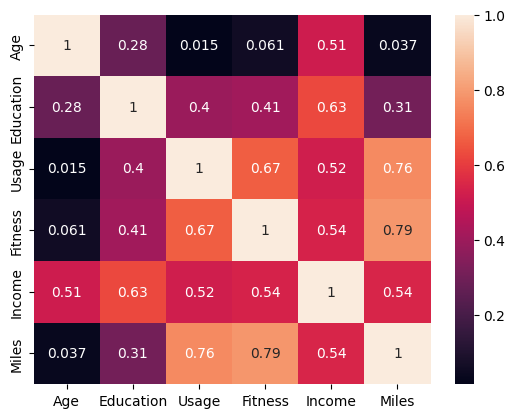

In [14]:
sbn.heatmap(df.corr(), annot=True
 )


<Axes: xlabel='Usage', ylabel='Age'>

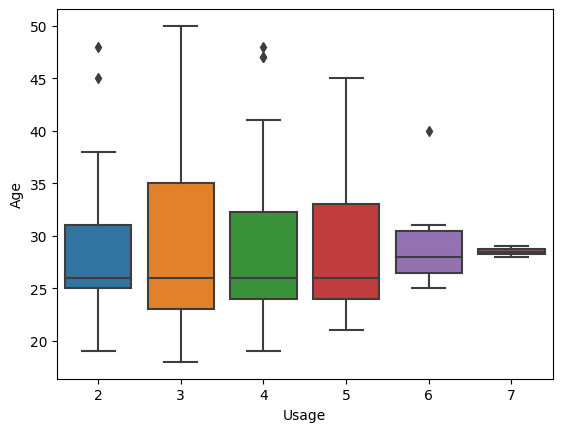

In [15]:
sbn.boxplot(x='Usage', y='Age' ,data=df)


In [ ]:
#which product is being bought by what kind of customers

In [16]:
pd.crosstab(index=df['Gender'], columns=df['Product'])


Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [17]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [18]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [19]:
#denominator - Males -- It will be proportion of males buying 781

In [20]:
#What is the contribution of males in buying KP781 -- Conditional
#Get me the % of males given that product is 781


In [21]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize='columns')*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,50.0,48.333333,17.5,42.222222
Male,50.0,51.666667,82.5,57.777778


In [22]:
#contribution of females buying 481 -- 48.3


In [23]:
pd.crosstab(index=df['Gender'], columns=df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [24]:
#what is the portion of females buying 281
#40/80 or 40/76 ?

In [25]:
pd.crosstab(index=df['Gender'], columns=df['Product'], normalize='index')*100


Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769


In [26]:
df.groupby(['Gender', 'Product'])['Income'].mean().unstack()



Product,KP281,KP481,KP781
Gender,,,
Female,46020.075,49336.448276,73633.857143
Male,46815.975,48634.258065,75825.030303


<Axes: xlabel='Product', ylabel='Income'>

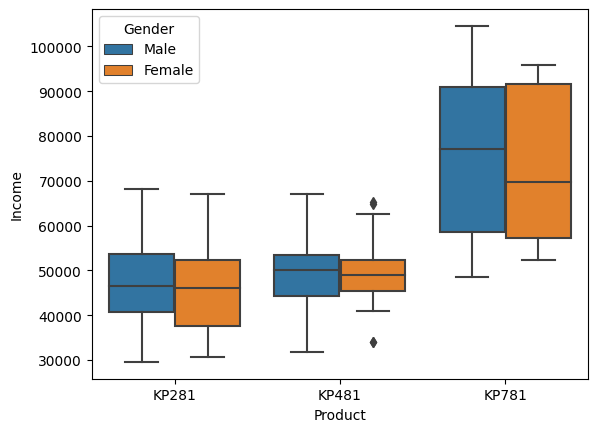

In [27]:
sbn.boxplot (y='Income', x='Product', hue='Gender', data=df)